In [1]:
%matplotlib notebook
import sys
sys.path.append('../getData')
from getData import getData
import pandas as pd
import pymongo as mongo
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import numpy as np
import seaborn as sbn
import datetime as dt

In [2]:
data = getData()

In [3]:
# metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52275 entries, 0 to 52274
Data columns (total 7 columns):
category         52275 non-null object
categoryID       52275 non-null int64
dealID           52275 non-null int64
purchaseDate     52275 non-null object
purchaseID       52275 non-null int64
purchaseTotal    52275 non-null int64
userID           52275 non-null int64
dtypes: int64(5), object(2)
memory usage: 2.8+ MB


In [4]:
data = data.set_index(["userID","purchaseID"])
data.head()

category  categoryID  dealID         purchaseDate  \
userID purchaseID                                                         
13     722181      Automoviles        3117   40269  2016-08-30 09:49:21   
       659223      Gastronomía        3113   34097  2016-04-25 12:43:14   
       720253      Gastronomía        3113   34097  2016-04-28 12:05:19   
103    801660      Gastronomía        3113   52469  2017-08-09 17:15:54   
       789893      Fundaciones        3177   47976  2017-03-28 17:16:45   

                   purchaseTotal  
userID purchaseID                 
13     722181               9600  
       659223               3000  
       720253               3000  
103    801660              14000  
       789893              15000

In [5]:
def makeGroup (df, groupField):
    grouped = df.groupby(groupField, as_index=False).size()
    grouped = pd.DataFrame(grouped).reset_index()

    grouped.columns = [groupField, 'Count']
    grouped=grouped.sort_values("Count",ascending = False)
    return grouped

<IPython.core.display.Javascript object>


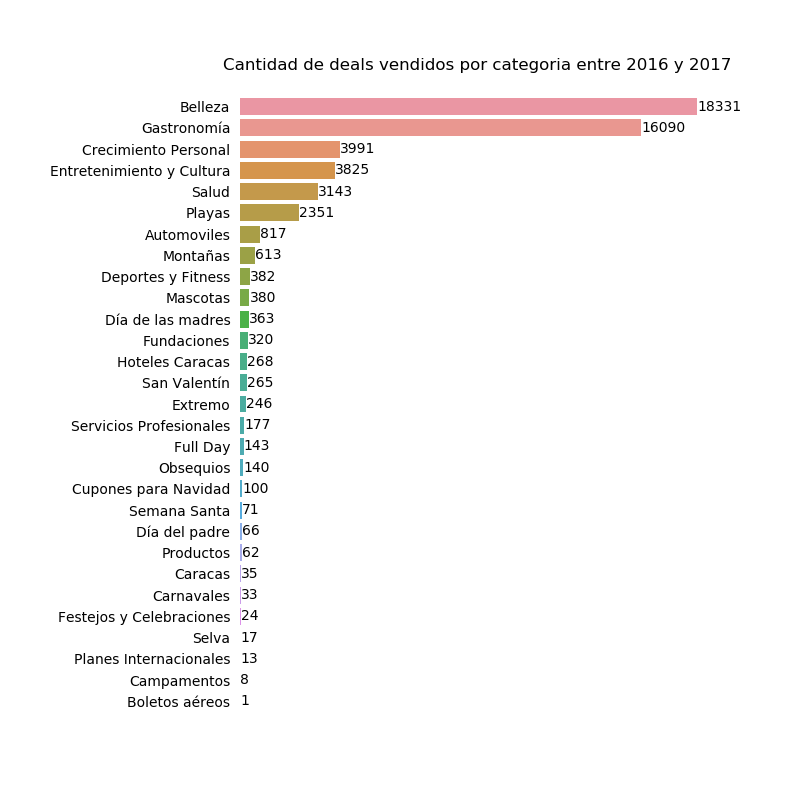

In [6]:
# Catidad de categorias
categories=makeGroup(data,"category")
plt.figure(figsize=(8,8))
ax = sbn.barplot(x="Count", y="category",data=categories);

ax.set_title("Cantidad de deals vendidos por categoria entre 2016 y 2017 \n")
ax.set_xlabel("")
ax.set_ylabel("")
plt.subplots_adjust(left=0.30)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for p in ax.patches:
        ax.annotate(int(p.get_width()), (p.get_width(),  p.get_y() + p.get_height()/2), va='center')

In [7]:
# Categorias por fechas
df_date =data.sort_values("purchaseDate")

df_date_2016=df_date[(df_date["purchaseDate"]>="2016-01-01 00:00:00") & (df_date["purchaseDate"]<="2016-12-31 23:59:59")]
df_date_2017=df_date[(df_date["purchaseDate"]>="2017-01-01 00:00:00") & (df_date["purchaseDate"]<="2017-12-31 23:59:59")]

<IPython.core.display.Javascript object>


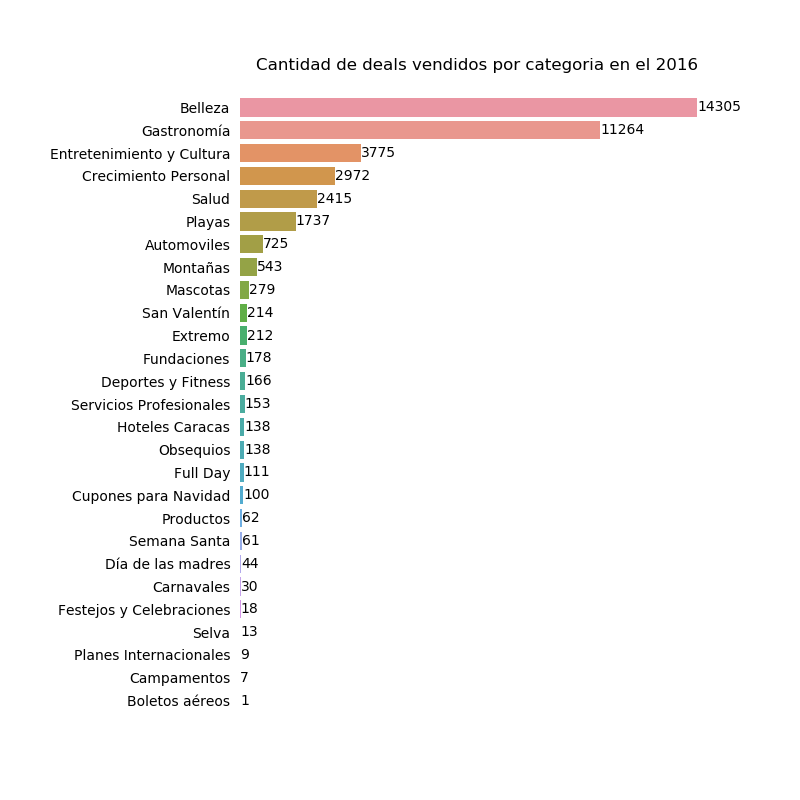

In [8]:
# categorias 2016

categories_2016=makeGroup(df_date_2016,"category")
plt.figure(figsize=(8,8))
ax = sbn.barplot(x="Count", y="category",data=categories_2016);

ax.set_title("Cantidad de deals vendidos por categoria en el 2016 \n")
ax.set_xlabel("")
ax.set_ylabel("")
plt.subplots_adjust(left=0.30)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for p in ax.patches:
        ax.annotate(int(p.get_width()), (p.get_width(),  p.get_y() + p.get_height()/2), va='center')

<IPython.core.display.Javascript object>


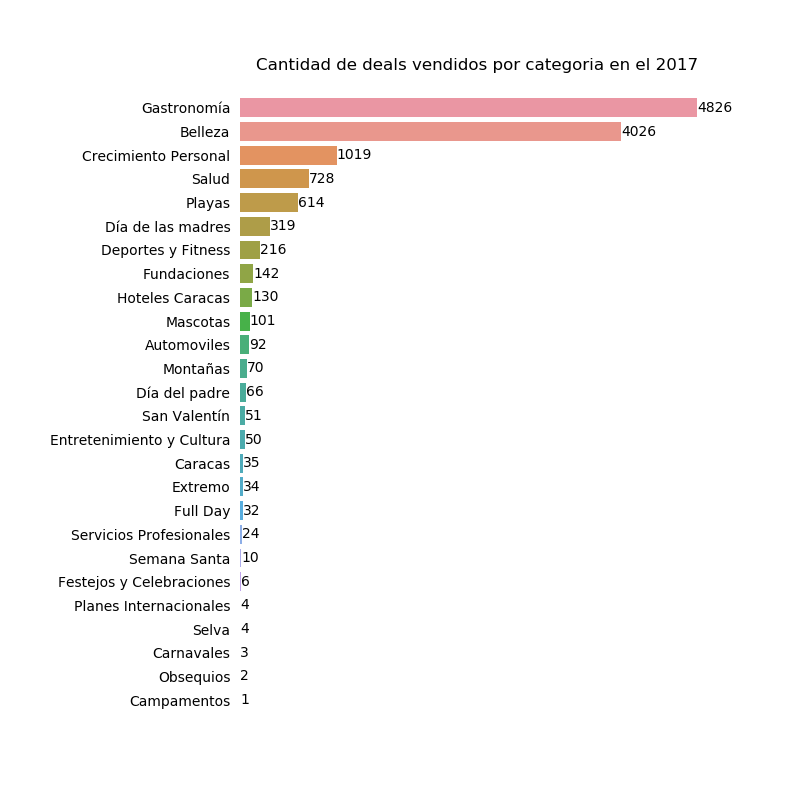

In [9]:
# categorias 2017

categories_2017=makeGroup(df_date_2017,"category")
plt.figure(figsize=(8,8))
ax = sbn.barplot(x="Count", y="category",data=categories_2017);

ax.set_title("Cantidad de deals vendidos por categoria en el 2017 \n")
ax.set_xlabel("")
ax.set_ylabel("")
plt.subplots_adjust(left=0.30)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for p in ax.patches:
        ax.annotate(int(p.get_width()), (p.get_width(),  p.get_y() + p.get_height()/2), va='center')

In [10]:
def makeGroupSum (df, groupField, calcField):
    grouped = df.groupby(groupField, as_index=False)[calcField].sum()
   # grouped.columns = [groupField, 'Total']
    grouped=grouped.sort_values("purchaseTotal",ascending = False)
    return grouped

<IPython.core.display.Javascript object>


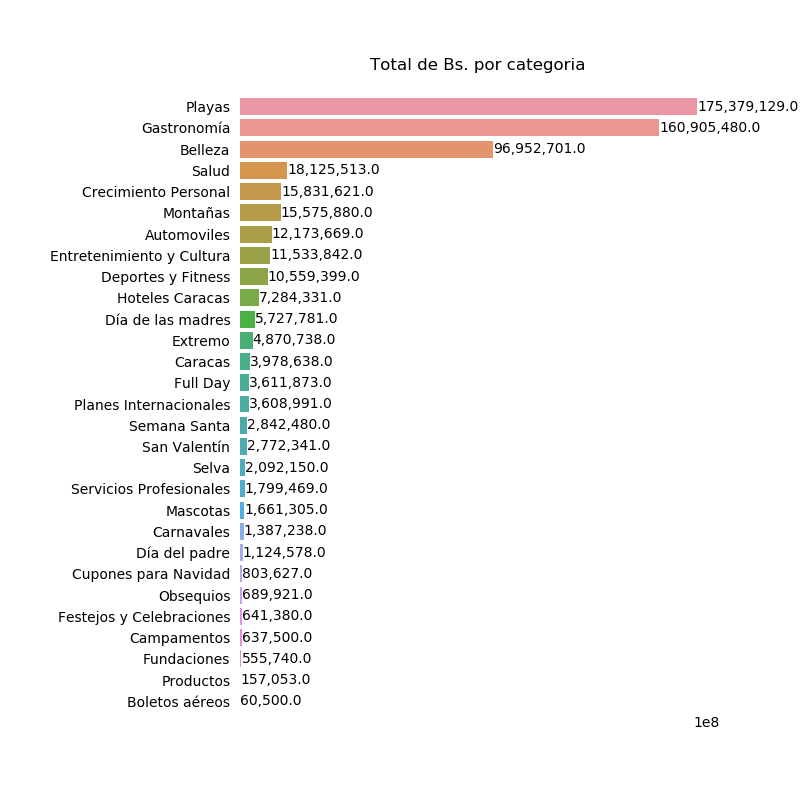

In [11]:
totalC=makeGroupSum(data,"category","purchaseTotal")
plt.figure(figsize=(8,8))
ax = sbn.barplot(x="purchaseTotal", y="category",data=totalC);

ax.set_title("Total de Bs. por categoria \n")
ax.set_xlabel("")
ax.set_ylabel("")
plt.subplots_adjust(left=0.30)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for p in ax.patches:
        ax.annotate("{:,}".format(p.get_width()), (p.get_width(),  p.get_y() + p.get_height()/2), va='center')

In [12]:
dfByMonth = data.copy()
dfByMonth["purchaseDate"] = pd.to_datetime(dfByMonth["purchaseDate"])
dfByMonthGroup=dfByMonth.groupby(dfByMonth["purchaseDate"].dt.strftime('%m-%Y'))["purchaseTotal"].sum().sort_values()
dfByMonthGroup = pd.DataFrame(dfByMonthGroup).reset_index()
dfByMonthGroup["purchaseDate"] = pd.to_datetime(dfByMonthGroup["purchaseDate"])
dfByMonthGroup.sort_values("purchaseDate", inplace=True)

dfByMonthGroup["purchaseDate"] = dfByMonthGroup["purchaseDate"].dt.strftime('%m-%Y')

<IPython.core.display.Javascript object>


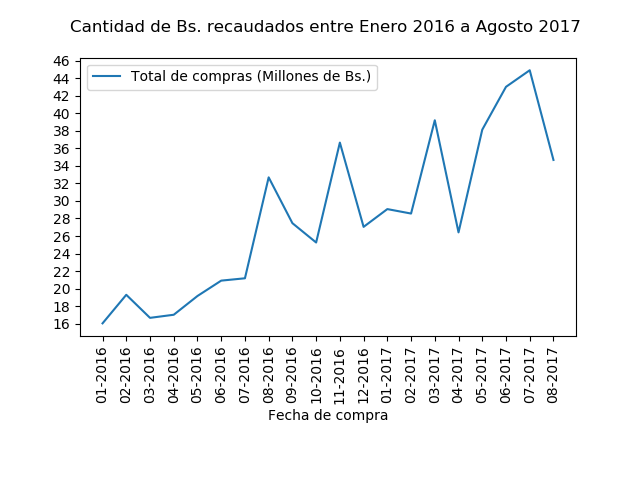

In [14]:
ax4 = dfByMonthGroup.plot(x="purchaseDate",y="purchaseTotal");

ax4.xaxis.set_major_locator(plt.MaxNLocator(25))
ax4.yaxis.set_major_locator(plt.MaxNLocator(20))

plt.ticklabel_format(style='plain', axis='y')

y = plt.yticks()
y=y[0]/1000000

ax4.set_xticks(np.arange(len(dfByMonthGroup["purchaseDate"])))
ax4.set_xticklabels(dfByMonthGroup["purchaseDate"], rotation="90")

ax4.set_yticklabels(y.astype(int))

plt.subplots_adjust(bottom=0.30)
plt.title("Cantidad de Bs. recaudados entre Enero 2016 a Agosto 2017 \n")
plt.legend(["Total de compras (Millones de Bs.)"])
plt.xlabel("Fecha de compra");